# 2.b

In [569]:
import numpy as np

class NeuralNet:
    def __init__(self):
        self.mult = lambda x,w,bias : x*w+bias

        self.tanh_diff = lambda x: (1+np.tanh(x))*(1-np.tanh(x))
        
        
        
        self.w0 = 2.0
        self.w1 = 3.0

        self.b0 = 2.0
        self.b1 = 3.0
        
        self.computational_history = []

    def forward(self, x):
        self.computational_history = []
        self.computational_history.append(x)
        x = np.tanh(self.mult(x,self.w0, self.b0))
        self.computational_history.append(x)

        x = np.tanh(self.mult(x,self.w1, self.b1))
        return x
    
    def backward(self, loss):
        loss = self.tanh_diff(loss)
        self.b1 += loss
        loss, self.w1 = loss * self.w1, self.w1+loss*self.computational_history.pop()
        
        loss = self.tanh_diff(loss)
        self.b0 += loss
        self.w0 = self.w0+loss*self.computational_history.pop()
        
        

In [570]:
A = NeuralNet()

## 학습되는지 테스트

In [571]:
ans_w0 = 7.0
ans_w1 = 6.0

ans_b0 = 13.0
ans_b1 = 5.0


In [572]:
from tqdm import tqdm
losses = []
dist = []
learnging_rate = 0.01
for i in range(10):
    x= np.random.random()*5-2.5
    y = np.tanh(np.tanh(x*ans_w0+ans_b0)*ans_w1 + ans_b1)
    x = A.forward(x)
    dist.append(abs(x-y))
    loss = abs(y-x) * learnging_rate
    losses.append(loss**2)
    A.backward(loss)
#     if i % 2 == 1:
#         print(np.mean(losses))
#         print(ans_w0- A.w0, ans_w1- A.w1,ans_b0- A.b0,ans_b1- A.b1)


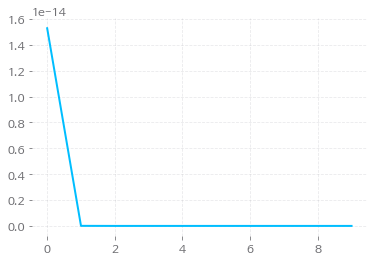

In [573]:
from matplotlib import pyplot as plt
plt.plot(losses)
plt.show()

# 2.c

In [584]:
import numpy as np

class NeuralNet:
    def __init__(self):

        
        self.w1 = 3.0
        self.w2 = 3.0
        

        
        self.computational_history = []

    def forward(self, x):
        self.computational_history = []
        self.computational_history.append(x)

        x = x*self.w1
        self.computational_history.append(x)
        x = max(0,x)
        self.computational_history.append(x)
        x = x*self.w2
        
        
        return x
    
    def search_derivative(self, loss):
        w2_derivative = self.computational_history.pop() * loss
        loss = self.w2*loss
        loss = loss if 0<self.computational_history.pop() else 0
        
        w1_derivative = self.computational_history.pop() * loss
        print("w1_derivative: ", w1_derivative)
        print("w2_derivative: ", w2_derivative)

In [587]:
A = NeuralNet()
A.forward(-4)

0.0

In [588]:
A.search_derivative(-2)

w1_derivative:  0
w2_derivative:  0
